# COBRA (part2)

In [1]:
import cobra
from cobra.test import create_test_model
from cobra.flux_analysis import pfba
from cobra.flux_analysis import flux_variability_analysis as fva

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model = create_test_model("textbook")
iJO1366 = create_test_model("ecoli")

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


## loopless FVA

In [3]:
loop_reactions = [model.reactions.FRD7, model.reactions.SUCDi]
fva(model, reaction_list=loop_reactions, loopless=False)

,minimum,maximum
FRD7,0.000000,994.935624
SUCDi,5.064376,1000.000000


In [4]:
fva(model, reaction_list=loop_reactions, loopless=True)

,minimum,maximum
FRD7,0.000000,0.000000
SUCDi,5.064376,5.064376


In [5]:
# the pfba result is loopless
pfba(model, reactions=loop_reactions)

,fluxes,reduced_costs
FRD7,0.000000,2.0
SUCDi,5.064376,-2.0


## sampling

In [6]:
from cobra.sampling.sampling import sample

sample_sol = sample(model, n=500, method="achr", seed=42)
sample_sol

,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
0,-1.406030,-1.013204,-0.322615,11.032421,11.032421,-0.322615,0.346728,6.615094,-0.199964,-0.392826,...,-3.520886,2.887590,5.417669,888.041874,-6.615094,3.504645,4.249646,3.504645,3.498114,6.457541
1,-2.106727,-0.151526,-0.040959,9.354613,9.354613,-0.040959,21.708180,1.689302,-1.098021,-1.955202,...,-3.989737,33.013474,33.079110,442.761319,-1.689302,3.956401,2.342480,3.956401,3.942996,5.586761
2,-0.047360,-0.029079,-0.118548,10.922478,10.922478,-0.118548,11.827374,2.406679,-1.622845,-0.018282,...,-2.800881,5.347396,7.113739,502.923854,-2.406679,2.739162,25.326805,2.739162,2.714343,6.649913
3,-2.476344,-1.659925,-1.834436,8.678233,8.678233,-1.834436,1.593785,1.834920,-1.494758,-0.816419,...,-1.112178,3.758244,4.109335,494.461243,-1.834920,1.087491,18.804511,1.087491,1.077563,8.704949
4,-1.828363,-0.743960,-3.601803,8.872663,8.872663,-3.601803,4.877198,1.261692,-0.162167,-1.084404,...,-0.960019,0.726006,0.831314,615.497840,-1.261692,0.901065,18.550457,0.901065,0.877357,8.822476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-2.132209,-0.289623,-0.987723,10.111389,10.111389,-0.987723,14.808873,2.696833,-0.692024,-1.842586,...,-3.908019,25.254001,25.293305,269.078489,-2.696833,3.837392,2.651581,3.837392,3.808990,5.915070
496,-0.305703,-0.246515,-0.180515,10.791769,10.791769,-0.180515,29.482909,8.631583,-0.092331,-0.059189,...,-6.072104,21.785206,22.924497,471.928304,-8.631583,6.063953,17.584393,6.063953,6.060675,3.770425
497,-4.599628,-0.647061,-0.369113,10.531377,10.531377,-0.369113,2.198249,5.953093,-0.077662,-3.952568,...,-0.954431,8.040064,8.604110,127.574504,-5.953093,0.853364,14.242430,0.853364,0.812721,8.643851
498,-2.607790,-0.667130,-4.340062,5.937108,5.937108,-4.340062,3.032671,5.612885,-0.012848,-1.940660,...,-1.242539,5.365715,5.694780,254.415345,-5.612885,1.214094,23.549407,1.214094,1.202655,6.795757


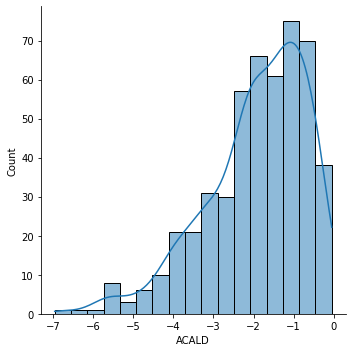

In [7]:
sns.displot(sample_sol["ACALD"], kde=True)

<AxesSubplot:>

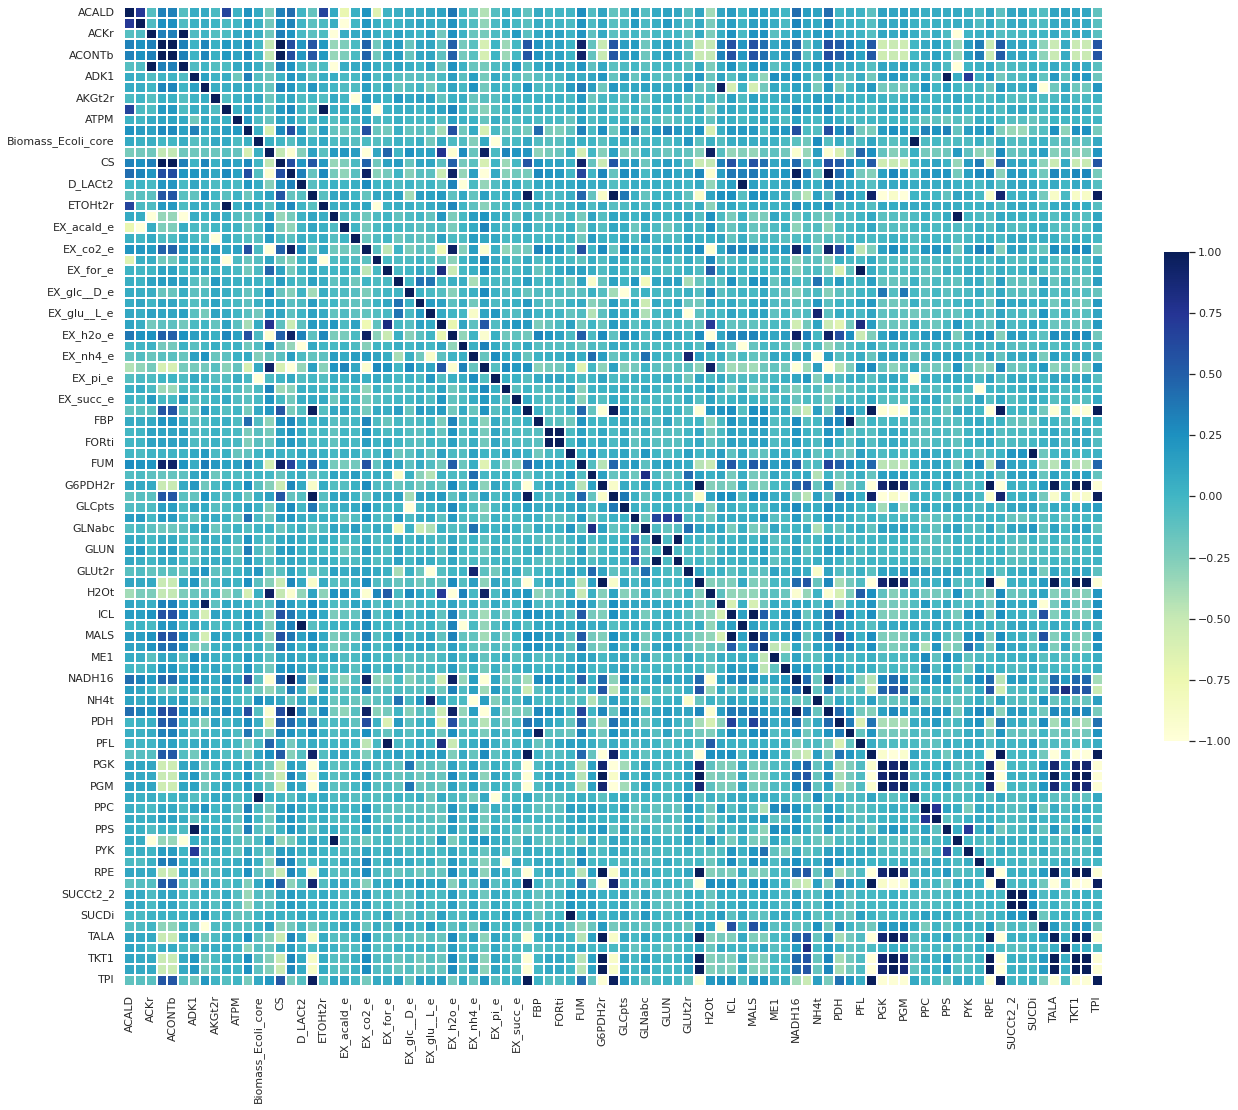

In [8]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(22, 18))
sns.heatmap(sample_sol.loc[:, (sample_sol != 0).all(axis=0)].corr(), cmap="YlGnBu", center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5})

## Gene and reaction essentiality

In [9]:

from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

print('complete model: ', model.slim_optimize())
with model:
    model.reactions.PFK.knock_out()
    print('pfk knocked out: ', model.slim_optimize())

complete model:  0.8739215069684304
pfk knocked out:  0.7040369478590295


In [10]:
gene_deletion_results = single_gene_deletion(model)

gene_deletion_results

,ids,growth,status
0,{b2492},0.873922,optimal
1,{b2276},0.211663,optimal
2,{b2587},0.873922,optimal
3,{b2987},0.873922,optimal
4,{b3603},0.873922,optimal
...,...,...,...
132,{b2280},0.211663,optimal
133,{b0755},0.873922,optimal
134,{b1812},0.873922,optimal
135,{b3734},0.374230,optimal


In [11]:
# essential genes
gene_deletion_results[(gene_deletion_results["status"] != "optimal") | gene_deletion_results["growth"] < 0.1]

,ids,growth,status


In [12]:
rxn_deletion_results = single_reaction_deletion(model)
rxn_deletion_results

,ids,growth,status
0,{EX_etoh_e},8.739215e-01,optimal
1,{PYK},8.649260e-01,optimal
2,{ATPS4r},3.742299e-01,optimal
3,{ACt2r},8.739215e-01,optimal
4,{EX_glu__L_e},8.739215e-01,optimal
...,...,...,...
90,{ICDHyr},-2.385226e-15,optimal
91,{ENO},2.368554e-15,optimal
92,{CYTBD},2.116629e-01,optimal
93,{PYRt2},8.739215e-01,optimal


In [13]:
# essential reactions
rxn_deletion_results[(rxn_deletion_results["status"] != "optimal") | rxn_deletion_results["growth"] < 0.1]

,ids,growth,status
53,{EX_nh4_e},0.0,optimal
54,{Biomass_Ecoli_core},0.0,optimal
63,{PGM},0.0,optimal
94,{PIt2r},0.0,optimal


In [14]:
del_double_genes = double_gene_deletion(model)
del_double_genes[(del_double_genes["status"] != "optimal") | del_double_genes["growth"] < 0.1]

,ids,growth,status
341,"{b0904, b1136}",0.0,optimal
378,"{b2779, b3386}",0.0,optimal
379,"{b0721, b2926}",0.0,optimal
641,"{b0351, b1136}",0.0,optimal
719,"{b1101, b1136}",0.0,optimal
1391,"{b3213, b1761}",0.0,optimal
1415,"{b0720, b3528}",0.0,optimal
2062,"{b0733, b1136}",0.0,optimal
2110,"{b0720, b0724}",0.0,optimal
2136,"{b1479, b2926}",0.0,optimal


In [15]:
del_double_rxns = double_reaction_deletion(model)
del_double_rxns[(del_double_rxns["status"] != "optimal") | del_double_rxns["growth"] < 0.1]

,ids,growth,status
9,"{Biomass_Ecoli_core, GND}",0.0,optimal
11,"{CS, PTAr}",0.0,optimal
100,"{CS, CYTBD}",0.0,optimal
148,"{RPI, Biomass_Ecoli_core}",0.0,optimal
151,"{FORt2, Biomass_Ecoli_core}",0.0,optimal
...,...,...,...
4380,"{NADH16, ACONTa}",0.0,optimal
4438,"{FORti, PIt2r}",0.0,optimal
4458,"{CYTBD, Biomass_Ecoli_core}",0.0,optimal
4489,"{MALS, Biomass_Ecoli_core}",0.0,optimal


## Consistency testing

In [16]:
# find block reactions (cannot generate flux)
blocked_reactions = cobra.flux_analysis.find_blocked_reactions(iJO1366)
blocked_reactions

['DM_aacald_c',
 'EX_14glucan_e',
 'EX_23camp_e',
 'EX_23ccmp_e',
 'EX_23cgmp_e',
 'EX_23cump_e',
 'EX_23dappa_e',
 'EX_26dap__M_e',
 'EX_2ddglcn_e',
 'EX_34dhpac_e',
 'EX_3amp_e',
 'EX_3cmp_e',
 'EX_3gmp_e',
 'EX_3hcinnm_e',
 'EX_3hpppn_e',
 'EX_3ump_e',
 'EX_4hoxpacd_e',
 'EX_LalaDglu_e',
 'EX_LalaLglu_e',
 'EX_acac_e',
 'EX_acgal_e',
 'EX_acgal1p_e',
 'EX_acgam_e',
 'EX_acgam1p_e',
 'EX_acmana_e',
 'EX_acmum_e',
 'EX_acnam_e',
 'EX_adocbl_e',
 'EX_ag_e',
 'EX_ala_B_e',
 'EX_all__D_e',
 'EX_amp_e',
 'EX_arab__L_e',
 'EX_arbt_e',
 'EX_arbtn_e',
 'EX_arbtn_fe3_e',
 'EX_ascb__L_e',
 'EX_aso3_e',
 'EX_btn_e',
 'EX_but_e',
 'EX_butso3_e',
 'EX_cbi_e',
 'EX_cd2_e',
 'EX_chol_e',
 'EX_chtbs_e',
 'EX_cm_e',
 'EX_cmp_e',
 'EX_cpgn_e',
 'EX_cpgn_un_e',
 'EX_crn_e',
 'EX_crn__D_e',
 'EX_csn_e',
 'EX_cu_e',
 'EX_cyan_e',
 'EX_cynt_e',
 'EX_cys__D_e',
 'EX_dad_2_e',
 'EX_damp_e',
 'EX_dca_e',
 'EX_dcmp_e',
 'EX_dcyt_e',
 'EX_ddca_e',
 'EX_dgmp_e',
 'EX_dgsn_e',
 'EX_dimp_e',
 'EX_din_e',
 'EX_dms

In [17]:
from cobra.flux_analysis import fastcc

consistent_iJO1366 = fastcc(iJO1366)
consistent_iJO1366

/home/sosiristseng/github/mmsb-bebi-5009-python/.venv/lib/python3.8/site-packages/cobra/core/group.py:107: UserWarning: need to pass in a list
  warn("need to pass in a list")


Name,iJO1366
Memory address,0x07fbde1351d90
Number of metabolites,1155
Number of reactions,1704
Number of groups,37
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [18]:
iJO1366

Name,iJO1366
Memory address,0x07fbdb7cf56d0
Number of metabolites,1805
Number of reactions,2583
Number of groups,37
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [19]:
len(set([r.id for r in consistent_iJO1366.reactions]) ^ (set([r.id for r in iJO1366.reactions]) - set(blocked_reactions)))

1

In [20]:
set([r.id for r in consistent_iJO1366.reactions]) ^ (set([r.id for r in iJO1366.reactions]) - set(blocked_reactions))

{'ARBt2rpp'}